In [12]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from heartdisease',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

1. Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

In [5]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [6]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

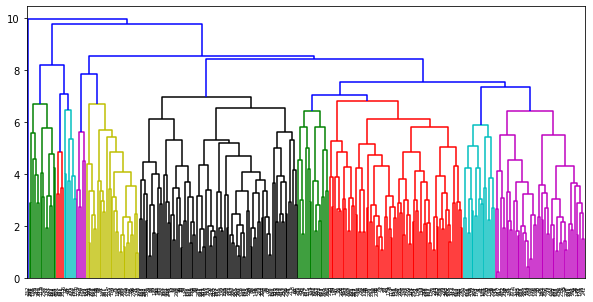

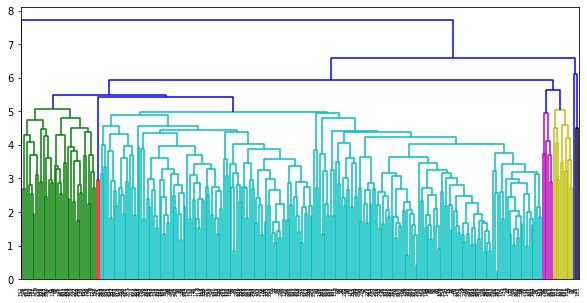

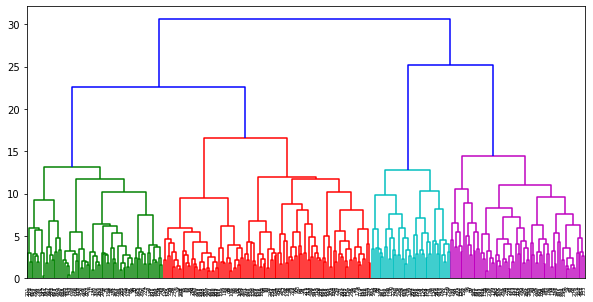

In [28]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='complete'))
plt.show()
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='average'))
plt.show()
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='ward'))
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster=AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=2)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.21394030618551016
The silhouette score of the Agglomerative Clustering solution: 0.11730765444448985


In [36]:
agg_cluster=AgglomerativeClustering(linkage='average',affinity='cosine',n_clusters=2)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2940490133353465
The silhouette score of the Agglomerative Clustering solution: 0.14837359969689895


In [32]:
agg_cluster=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=3)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.14859596899025246
The silhouette score of the Agglomerative Clustering solution: 0.155240382445262


2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [20]:
agg_cluster=AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=2)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.21394030618551016
The silhouette score of the Agglomerative Clustering solution: 0.11730765444448985


In [22]:
agg_cluster=AgglomerativeClustering(linkage='average',affinity='cosine',n_clusters=2)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2940490133353465
The silhouette score of the Agglomerative Clustering solution: 0.14837359969689895


In [21]:
agg_cluster=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=2)
cluster=agg_cluster.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.146129913123814
The silhouette score of the Agglomerative Clustering solution: 0.1387197366557222


Based on ARI and silhouette score, average linkage method is better.

In [26]:

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.4380857727169879
The silhouette score of the Agglomerative Clustering solution: 0.17530682286260937


KMeans is the best solution.